In [23]:
from zget_data import get_responses, get_qdetails, get_questions, page_map, quest_map
from collections import defaultdict
import pandas as pd
import json

In [24]:
survey_response, time_response = get_responses()

## Time Analysis

,index,1,2,3,4,5,6,7,csquest,spasssurvey,demo,total (mins)
0,47.704,8.317,5.774,20.529,3.303,35.736,6.323,62.769,1143.746,75.336,75.957,24.758233
1,8.529,3.295,2.195,72.718,4.212,17.386,2.465,25.687,696.829,80.177,122.039,17.258867
2,121.899,6.936,19.950,143.431,5.255,22.239,5.637,31.740,1094.535,132.327,250.360,30.571817
3,40.725,5.459,4.329,25.462,4.268,33.700,2.059,51.148,897.312,51.163,75.270,19.848250
4,94.517,1.465,1.784,2.418,1.715,2.317,1.786,2.398,512.819,53.485,0.000,11.245067
5,104.534,4.317,2.245,50.955,1.608,8.323,2.467,13.878,787.700,71.454,129.497,19.616300
6,137.121,21.852,5.410,156.476,4.377,11.117,3.619,25.426,532.156,156.805,215.188,21.159117
7,112.525,18.469,4.349,164.076,5.031,33.316,3.948,68.685,1014.168,145.120,280.664,30.839183
8,63.538,11.205,3.537,25.954,3.870,22.020,7.220,79.719,1088.877,97.159,197.108,26.670117
9,79.991,16.422,2.722,98.089,6.139,25.421,4.338,20.372,932.172,68.971,132.821,23.124300


22.509125000000004

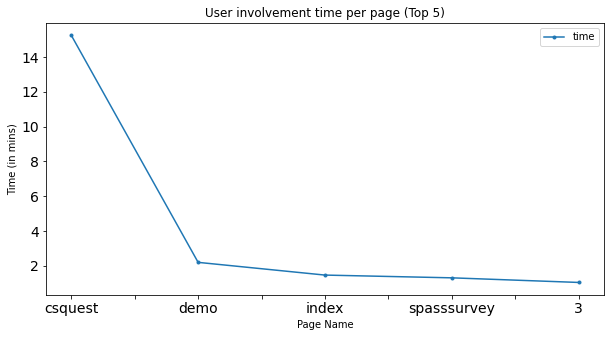

In [25]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df)
display(page_time_df['total (mins)'].mean())


# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [26]:
questions = get_questions()
survey_response_df = pd.DataFrame(survey_response)
display(survey_response_df)

,8,9,0,10,null
0,"{'Sto': {'12-1': '2', '5-1': '6', '5-2': '5', ...","{'1-1': 'lrndsk!schl', '2-1': 'Strong', '3-1':...","{'1-1': ['Schoolwork', 'Assignments and homewo...","{'1-1': 'Boy', '2-1': '11 years old', '3-1': '...",NaN
1,"{'Cus': {'6-1': '6', '7-1': '6', '1-1': '6', '...","{'1-1': 'slamedfingeroneday', '2-1': 'Very Str...","{'1-1': ['Assignments and homework', 'Games'],...","{'1-1': 'Boy', '2-1': '11 years old', '3-1': '...",NaN
2,"{'Sto': {'1-4': '7', '1-1': '7', '1-2': '7', '...","{'1-1': 'momswimming75', '2-1': 'Strong', '3-1...","{'1-1': ['Schoolwork', 'Assignments and homewo...","{'1-1': 'Girl', '2-1': '9 years old', '3-1': '...",NaN
3,"{'Sto': {'12-1': '1', '5-1': '7', '5-2': '7', ...","{'1-1': 'granddeep4810', '2-1': 'Very Strong',...","{'1-1': ['Games'], '2-1': '3 to 5 hours per day'}","{'1-1': 'Boy', '2-1': '8 years old', '3-1': '3...",NaN
4,"{'Cus': {'6-1': '4', '7-1': '5', '1-2': '5', '...","{'1-1': 'Iplayeddogfun6th', '2-1': 'Very Stron...","{'1-1': ['Schoolwork', 'Assignments and homewo...","{'1-1': 'Boy', '2-1': '11 years old', '3-1': '...","{'1-1': 'Boy', '2-1': '11 years old', '3-1': '..."
5,"{'Sto': {'1-1': '4', '1-3': '4', '1-2': '5', '...","{'1-1': 'Rever1e5th', '2-1': 'Very Strong', '3...","{'1-1': ['Schoolwork', 'Assignments and homewo...","{'1-1': 'Girl', '2-1': '12 years old', '3-1': ...",NaN
6,"{'Cus': {'6-1': '4', '7-1': '7', '1-4': '6', '...","{'1-1': 'funtodogames', '2-1': 'Medium', '3-1'...","{'1-1': ['Schoolwork', 'Assignments and homewo...","{'1-1': 'Girl', '2-1': '8 years old', '3-1': '...",NaN
7,"{'Sto': {'1-2': '6', '1-1': '7', '1-4': '7', '...","{'1-1': 'brotherrabbit11', '2-1': 'Strong', '3...","{'1-1': ['Schoolwork', 'Assignments and homewo...","{'1-1': 'Girl', '2-1': '11 years old', '3-1': ...",NaN
8,"{'Sto': {'12-1': '2', '5-1': '6', '5-2': '7', ...","{'1-1': 'JPawesome@8yrs', '2-1': 'Strong', '3-...","{'1-1': ['Assignments and homework', 'Games', ...","{'1-1': 'Boy', '2-1': '11 years old', '3-1': '...",NaN
9,"{'Sto': {'1-4': '6', '1-2': '5', '1-1': '5', '...","{'1-1': 'Ipandajump', '2-1': 'Strong', '3-1': ...","{'1-1': ['Schoolwork', 'Assignments and homewo...","{'1-1': 'Girl', '2-1': '10 years old', '3-1': ...",NaN


In [27]:
normqsid = ['1-1', '1-2', '1-3', '1-4', '2-1', '3-1', '5-1', '5-2', '5-3', '5-4', '6-1', '7-1', '9-1', '10-1']
dnames = ['Sto', 'Cus', 'Bas']

normcolumns = [f'{qsid}_{dname}' for qsid in normqsid for dname in dnames]

def test(d):
    temp = {}
    for k, v in d.items():
        for k2, v2 in v.items():
            q = f'{k2}_{k}'
            temp[q] = v2
    return temp

csquest_response_df = survey_response_df['8'].apply(test)

In [28]:
csquest_design_df = pd.DataFrame(csquest_response_df.to_dict()).T
csquest_design_df

,12-1_Sto,5-1_Sto,5-2_Sto,5-3_Sto,5-4_Sto,9-1_Sto,10-1_Sto,2-1_Sto,3-1_Sto,6-1_Sto,...,10-1_Bas,11-1_Bas,1-3_Bas,1-1_Bas,1-2_Bas,1-4_Bas,13-1_Sto,8-1_Sto,11-1_Sto,4-1_Sto
0,2,6,5,7,6,5,7,4,5,5,...,7,3rd design because it shows how in different s...,4,5,6,7,NaN,NaN,NaN,NaN
1,2,7,6,6,7,7,6,5,6,6,...,7,NaN,5,6,4,5,Second one because it's really easy for me to ...,The second one because it motivated me because...,The middle one because it's easier for me unde...,The second one because I like how it says like...
2,1,7,7,7,6,7,6,7,7,7,...,7,NaN,6,7,7,7,I liked the first design the most because it w...,The first design was the most entertaining and...,The first design was the easiest for me to und...,I think all the designs was engaging because f...
3,1,7,7,5,7,7,7,7,4,7,...,7,3rd because it shows an example of it \nhappen...,7,4,5,7,NaN,NaN,NaN,NaN
4,2,1,3,2,1,7,2,7,5,7,...,7,NaN,5,5,5,4,The second one is the best because it shows ho...,Probably the first one cause that could happen...,Second one cause it shows the steps on how to ...,The first one is the best one for capturing my...
5,2,6,5,6,4,7,6,6,5,7,...,5,NaN,6,6,6,7,I loved the third design because it got the po...,The second and third designs were less helpful...,I think the third design is best at helping me...,I think the third design captured my attention...
6,1,7,7,7,7,7,7,7,7,7,...,7,NaN,4,4,4,4,Because it had very much details and it was in...,The first one because it had like all the reas...,The second one because it gives you steps.,The first one because it like had lots of deta...
7,3,7,7,7,7,7,6,6,6,7,...,6,NaN,7,6,7,7,I liked the last design more because it was ea...,The last one.,The last one because I understand it better.,I like the last one.
8,2,6,7,6,6,6,7,6,7,7,...,7,The third one is the best in understanding how...,6,4,5,6,NaN,NaN,NaN,NaN
9,2,5,6,3,5,6,6,6,6,6,...,7,NaN,7,6,6,7,because it explians better to me then the othe...,1st because it helped me understand what to do...,2nd because you can take a sentence and just t...,2nd because it is a good way that you could re...


In [29]:
csquest_quant_df = csquest_design_df[normcolumns].astype(int)
norm_csquest_quant_df = csquest_quant_df.sub(4)

In [30]:
norm_csquest_quant_df

,1-1_Sto,1-1_Cus,1-1_Bas,1-2_Sto,1-2_Cus,1-2_Bas,1-3_Sto,1-3_Cus,1-3_Bas,1-4_Sto,...,6-1_Bas,7-1_Sto,7-1_Cus,7-1_Bas,9-1_Sto,9-1_Cus,9-1_Bas,10-1_Sto,10-1_Cus,10-1_Bas
0,2,0,1,1,0,2,-1,1,0,3,...,1,3,3,3,1,1,1,3,3,3
1,0,2,2,0,1,0,1,2,1,1,...,3,2,2,3,3,2,3,2,2,3
2,3,3,3,3,3,3,3,2,2,3,...,3,3,3,3,3,3,3,2,3,3
3,1,2,0,3,3,1,3,-1,3,2,...,3,3,2,3,3,3,3,3,3,3
4,-2,1,1,0,1,1,-2,0,1,-2,...,0,3,1,2,3,0,2,-2,1,3
5,0,2,2,1,2,2,0,1,2,1,...,1,2,3,3,3,3,3,2,3,1
6,0,3,0,3,1,0,3,2,0,3,...,0,3,3,3,3,3,3,3,3,3
7,3,1,2,2,2,3,1,1,3,3,...,2,2,3,2,3,3,3,2,3,2
8,2,1,0,1,2,1,2,1,2,2,...,1,3,2,2,2,3,2,3,3,3
9,1,0,2,1,1,2,2,3,3,2,...,2,2,1,2,2,0,1,2,-1,3


In [31]:
norm_sto_df = norm_csquest_quant_df.filter(like='Sto')
norm_cus_df = norm_csquest_quant_df.filter(like='Cus')
norm_bas_df = norm_csquest_quant_df.filter(like='Bas')

In [32]:
condition = '1-|5-'
new_norm_sto_df = norm_sto_df.filter(regex=f'^(?!.*{condition}).*$', axis=1)

new_column_names = {old_name: old_name.split('-')[0] for old_name in new_norm_sto_df.columns}
new_norm_sto_df = new_norm_sto_df.rename(columns=new_column_names)

temp = norm_sto_df.filter(like='1-')
new_norm_sto_df['1'] = temp.T.mean()

temp = norm_sto_df.filter(like='5-')
new_norm_sto_df['5'] = temp.T.mean()



# temp = norm_cus_df.filter(like='1-')
# temp.T.mean()

# temp = norm_bas_df.filter(like='1-')
# temp.T.mean()


# temp = norm_cus_df.filter(like='5-')
# temp.T.mean()

# temp = norm_bas_df.filter(like='5-')
# temp.T.mean()

display(new_norm_sto_df)


condition = '1-|5-'
new_norm_cus_df = norm_cus_df.filter(regex=f'^(?!.*{condition}).*$', axis=1)

new_column_names = {old_name: old_name.split('-')[0] for old_name in new_norm_cus_df.columns}
new_norm_cus_df = new_norm_cus_df.rename(columns=new_column_names)

temp = norm_cus_df.filter(like='1-')
new_norm_cus_df['1'] = temp.T.mean()

temp = norm_cus_df.filter(like='5-')
new_norm_cus_df['5'] = temp.T.mean()

display(new_norm_cus_df)


condition = '1-|5-'
new_norm_bas_df = norm_bas_df.filter(regex=f'^(?!.*{condition}).*$', axis=1)

new_column_names = {old_name: old_name.split('-')[0] for old_name in new_norm_bas_df.columns}
new_norm_bas_df = new_norm_bas_df.rename(columns=new_column_names)

temp = norm_bas_df.filter(like='1-')
new_norm_bas_df['1'] = temp.T.mean()

temp = norm_bas_df.filter(like='5-')
new_norm_bas_df['5'] = temp.T.mean()

display(new_norm_bas_df)


,2,3,6,7,9,10,1,5
0,0,1,1,3,1,3,1.25,2.00
1,1,2,2,2,3,2,0.50,2.50
2,3,3,3,3,3,2,3.00,2.75
3,3,0,3,3,3,3,2.25,2.50
4,3,1,3,3,3,-2,-1.50,-2.25
5,2,1,3,2,3,2,0.50,1.25
6,3,3,3,3,3,3,2.25,3.00
7,2,2,3,2,3,2,2.25,3.00
8,2,3,3,3,2,3,1.75,2.25
9,2,2,2,2,2,2,1.50,0.75


,2,3,6,7,9,10,1,5
0,1,0,1,3,1,3,0.75,2.00
1,2,1,2,2,2,2,1.75,2.75
2,2,3,3,3,3,3,2.75,2.75
3,2,1,3,2,3,3,1.75,2.25
4,0,0,0,1,0,1,0.50,0.75
5,2,3,2,3,3,3,2.00,2.25
6,0,3,0,3,3,3,2.00,3.00
7,3,3,3,3,3,3,1.75,3.00
8,2,2,1,2,3,3,1.50,3.00
9,1,1,1,1,0,-1,1.50,1.25


,2,3,6,7,9,10,1,5
0,0,1,1,3,1,3,1.50,2.00
1,2,1,3,3,3,3,1.00,2.75
2,2,3,3,3,3,3,2.75,2.75
3,0,3,3,3,3,3,1.75,3.00
4,1,2,0,2,2,3,0.75,1.50
5,2,2,1,3,3,1,2.25,2.00
6,0,0,0,3,3,3,0.00,3.00
7,3,2,2,2,3,2,2.75,2.75
8,2,1,1,2,2,3,1.25,2.25
9,3,3,2,2,1,3,2.50,2.25


In [33]:
display(pd.DataFrame(new_norm_sto_df.mean()).T)
display(pd.DataFrame(new_norm_cus_df.mean()).T)
display(pd.DataFrame(new_norm_bas_df.mean()).T)

,2,3,6,7,9,10,1,5
0,2.1,1.8,2.6,2.6,2.6,2.0,1.375,1.775


,2,3,6,7,9,10,1,5
0,1.5,1.7,1.6,2.3,2.1,2.3,1.625,2.3


,2,3,6,7,9,10,1,5
0,1.5,1.8,1.6,2.6,2.4,2.7,1.65,2.425
